In [2]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
from matplotlib import pyplot as plt
import random 
%matplotlib inline

##### Load required datasets

In [3]:
credits = pd.read_csv("../datasets/TMDB/tmdb_5000_credits.csv")
movies = pd.read_csv("../datasets/TMDB/tmdb_5000_movies.csv")
ratings = pd.read_csv("../datasets/The_Movies/ratings_small.csv")
links = pd.read_csv("../datasets/The_Movies/links_small.csv")
movies_unchanged = movies
credits_unchanged = credits
links_unchanged = links
ratings_unchanged = ratings

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


##### remove irrelevant features

In [5]:
movies = movies[['genres','id','keywords','title','overview','popularity','vote_average','vote_count']]
movies.head(2)

,genres,id,keywords,title,overview,popularity,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500


##### Rename the movie id column names , as they are different in different datasets. For TMDB using tmdbId

In [6]:

movies = movies.rename(columns={"id":"tmdbId"})
if('title' in credits):
    credits = credits.drop(columns=["title"])
credits = credits.rename(columns={"movie_id":"tmdbId"})
credits.head()

,tmdbId,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### Combine movies and credits to single dataset & check if duplicates exist

In [7]:

print("Duplicate movie id's conunt in movies df: ",movies.tmdbId.duplicated().sum())
print("Duplicate movie id's conunt in credits df: ",credits.tmdbId.duplicated().sum())
movies = movies.merge(credits,on="tmdbId")
movies.head(2)

Duplicate movie id's conunt in movies df:  0
Duplicate movie id's conunt in credits df:  0


,genres,tmdbId,keywords,title,overview,popularity,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


##### Check if null values exist

In [8]:
movies.isnull().sum()

genres          0
tmdbId          0
keywords        0
title           0
overview        3
popularity      0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

##### Fill all null values with empty character

In [9]:
movies = movies.fillna("")
movies.isnull().sum()

genres          0
tmdbId          0
keywords        0
title           0
overview        0
popularity      0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

##### check for duplicate records

In [10]:
print("duplicated records", movies.duplicated().sum())

duplicated records 0


##### Genres data is represented in JSON format. Re-format the column values to list

Text(0.5, 1.0, 'Top 10 Genres')

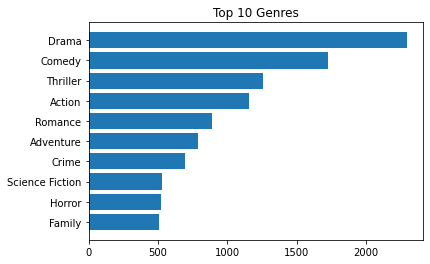

In [11]:
if(isinstance(movies.genres[0], str)):
    genreList = []
    for i in movies.genres:
        JSON = json.loads(i)
        movieGenres = []
        for j in JSON:
            movieGenres.append(j['name'])
        genreList.append(movieGenres[:5])
    movies = movies.drop(columns = ['genres'])
    movies['genres'] = pd.Series(genreList)
movies.genres.head(2)
#plot graph
genresList = []
for i in movies.genres:
     genresList.extend(i)
counts = pd.Series(genresList).value_counts()[:10].sort_values(ascending=True)
plt.barh(counts.index,counts)
plt.title('Top 10 Genres')

##### Cast data is represented in JSON format. Re-format the column values to list

Text(0.5, 1.0, 'Top 10 Cast')

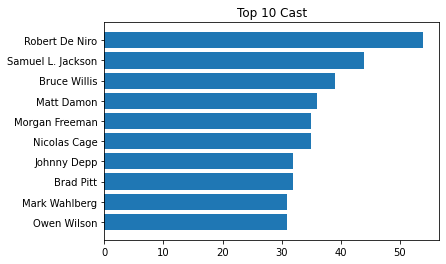

In [12]:
if(isinstance(movies.cast[0], str)):
    castList = []
    for i in movies.cast:
        JSON = json.loads(i)
        movieCast = []
        for j in JSON:
            movieCast.append(j['name'])
        castList.append(movieCast[:5])
    movies = movies.drop(columns = ['cast'])
    movies['cast'] = pd.Series(castList)
movies.cast.head(2)
#plot graph 
castList = []
for i in movies.cast:
     castList.extend(i)
counts = pd.Series(castList).value_counts()[:10].sort_values(ascending=True)
plt.barh(counts.index,counts)
plt.title('Top 10 Cast')

##### Sample List of crew members  job role in a movie

In [13]:
JSON = json.loads(credits_unchanged.crew[0])
jobs = []
for j in JSON:
    jobs.append(j['job'])
print(set(jobs))

{'Foley', 'Visual Effects Supervisor', 'Makeup Artist', 'Production Supervisor', 'Production Design', 'Conceptual Design', 'Art Department Coordinator', 'Music Editor', 'Choreographer', 'Assistant Art Director', 'Dialogue Editor', 'Best Boy Electric', 'Director', 'Supervising Sound Editor', 'Sound Effects Editor', 'Visual Effects Editor', 'Transportation Coordinator', 'Sound Designer', 'Camera Operator', 'Editor', 'Original Music Composer', 'Producer', 'Steadicam Operator', 'Costume Supervisor', 'Still Photographer', 'Lighting Artist', 'CG Supervisor', 'Dialect Coach', 'Visual Effects Producer', 'Motion Capture Artist', 'Art Direction', 'Digital Intermediate', 'Set Costumer', 'Stunts', 'Visual Effects Art Director', 'Writer', 'Production Manager', 'Makeup Department Head', 'Set Designer', 'Modeling', 'Special Effects Coordinator', 'Casting', 'Animation Director', 'Costume Design', 'Publicist', 'Art Department Manager', 'Set Decoration', 'Sound Re-Recording Mixer', 'Director of Photogra

##### Crew data is represented in JSON format & there are several crew job positions available. Select Director role which we use for prediction

Text(0.5, 1.0, 'Top 10 directors')

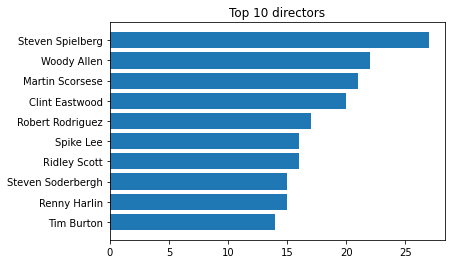

In [14]:
if(('crew' in movies) and (isinstance(movies.crew[0], str))):
    directorList = []
    for i in movies.crew:
        JSON = json.loads(i)
        movieDirectors = []
        for j in JSON:
            if(j['job'] == 'Director'):
                movieDirectors.append(j['name'])
        directorList.append(movieDirectors[:5])
    movies = movies.drop(columns = ['crew'])
    movies['directors'] = pd.Series(directorList)
movies['directors']
#plot graph
directorsList = []
for i in movies.directors:
     directorsList.extend(i)
counts = pd.Series(directorsList).value_counts()[:10].sort_values(ascending=True)
plt.barh(counts.index,counts)
plt.title('Top 10 directors')

##### Similarly clean keywords column data

In [15]:
if(isinstance(movies.keywords[0], str)):
    keywordsList = []
    for i in movies.keywords:
        JSON = json.loads(i)
        movieKeywords = []
        for j in JSON:
            movieKeywords.append(j['name'])
        keywordsList.append(movieKeywords[:5])
    movies = movies.drop(columns = ['keywords'])
    movies['keywords'] = pd.Series(keywordsList)
movies.keywords.head(2)

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
Name: keywords, dtype: object

##### Function to merge multiple words in name field to avoid partial names as common features 

In [16]:
def formatData(column):
    movies[column] = [[str.lower(j.replace(" ", "_")) for j in i ] for i in movies[column]]

##### format keywords, cast, directors, genres

In [17]:
formatData('keywords')
formatData('cast')
formatData('directors')
formatData('genres')
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_..."


#### Combine all the extracted features to a single column which we use it for prediction. 

In [18]:
movies['content'] = (movies['keywords'] + movies['cast'] + movies['directors'] + movies['genres'])
movies['content'] = movies['content'].apply(lambda x: ' '.join(x))
movies['content'][0]

'culture_clash future space_war space_colony society sam_worthington zoe_saldana sigourney_weaver stephen_lang michelle_rodriguez james_cameron action adventure fantasy science_fiction'

In [19]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [20]:
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_...",ocean drug_abuse exotic_island east_india_trad...


##### Merge Movies with links.csv to get the corresponding movieId and imdbId of each movie in TMDB dataset

In [21]:
movies = movies.merge(links,on='tmdbId')
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content,movieId,imdbId
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_...",ocean drug_abuse exotic_island east_india_trad...,53125,449088


##### Few movies that are present in TMDB dataset are not present in Ratings dataset. So After joining these two datasets the final movies count is reduced. 

In [22]:
ids = ratings['movieId'].unique()
movies = movies[movies['movieId'].isin(ids)]
movies = movies.reset_index(drop=True)
movies.shape

(3394, 13)

##### Merge TMDB dataset with Ratings dataset

In [23]:
movieRatings = movies.merge(ratings,on='movieId')
movieRatings.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content,movieId,imdbId,userId,rating,timestamp
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549,15,4.0,1261944230
1,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549,26,3.5,1352597807


##### keep only relevant features for movie ratings dataset

In [24]:
movieRatings = movieRatings[['tmdbId','movieId','title','userId','rating']]
movieRatings.head()

,tmdbId,movieId,title,userId,rating
0,19995,72998,Avatar,15,4.0
1,19995,72998,Avatar,26,3.5
2,19995,72998,Avatar,31,4.0
3,19995,72998,Avatar,48,4.5
4,19995,72998,Avatar,72,2.0


In [25]:
movieRatings.isna().sum()

tmdbId     0
movieId    0
title      0
userId     0
rating     0
dtype: int64

In [26]:
print('total movies in TMDB dataset after merge: ' ,len(movies.tmdbId.unique()))

total movies in TMDB dataset after merge:  3394


In [27]:
print('total movies in Ratings dataset after merge: ', len(movieRatings.tmdbId.unique()))

total movies in Ratings dataset after merge:  3394


In [28]:
print('initial movies count in Ratings dataset : ', len(ratings.movieId.unique()))

initial movies count in Ratings dataset :  9066


In [29]:
movieRatings

,tmdbId,movieId,title,userId,rating
0,19995,72998,Avatar,15,4.0
1,19995,72998,Avatar,26,3.5
2,19995,72998,Avatar,31,4.0
3,19995,72998,Avatar,48,4.5
4,19995,72998,Avatar,72,2.0
...,...,...,...,...,...
66942,9367,3267,El Mariachi,460,3.5
66943,9367,3267,El Mariachi,580,4.0
66944,9367,3267,El Mariachi,596,3.5
66945,9367,3267,El Mariachi,624,3.5


##### plot histogram for user rated movies

<AxesSubplot:xlabel='rating', ylabel='Count'>

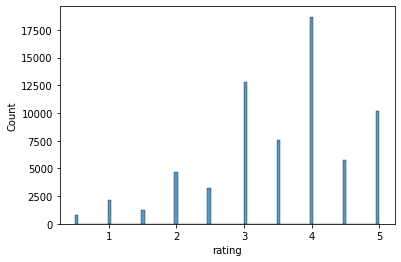

In [30]:
sns.histplot(movieRatings["rating"],)

In [31]:
print("Total no of users : " , np.count_nonzero(movieRatings['userId'].unique()))

Total no of users :  671


In [32]:
print("Total no of movies : " , np.count_nonzero(movieRatings['tmdbId'].unique()))

Total no of movies :  3394


##### Creating a random user 

In [33]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies[ratedMovies['rating']>avgRating]
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("total movies rated : ",len(ratedMovies))
print("avg ratings :" , avgRating)
topRatedMovies['title'].head()

userId :  586
total movies rated :  51
avg ratings : 3.4313725490196076


3916     The Bourne Ultimatum
12599        A Beautiful Mind
55071            Pulp Fiction
51097            Time Bandits
26628         The Sixth Sense
Name: title, dtype: object

##### Create a map for fetching index using movieId

In [34]:
movieIdIndex = pd.Series(movies.index, index=movies['movieId'])
movieIdIndex.head()

movieId
72998     0
53125     1
136020    2
91529     3
93363     4
dtype: int64

##### Create a map for fetching index using tmdbId

In [35]:
tmdbIdIndex = pd.Series(movies.index, index=movies['tmdbId'])
tmdbIdIndex.head()

tmdbId
19995     0
285       1
206647    2
49026     3
49529     4
dtype: int64

##### Recommend movies based on the popularity score of each movie. Used if user in new or has no ratings. 

Text(0.5, 1.0, 'Most popular Movies')

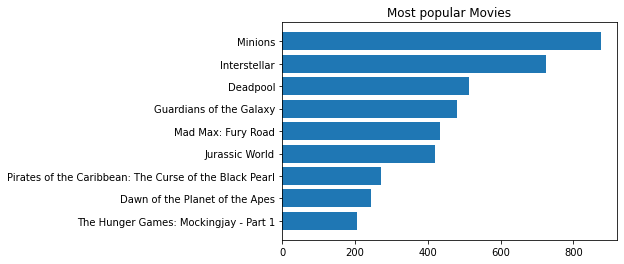

In [36]:
def getPopularMovies():
    popular = movies.sort_values(['popularity'],ascending=False)
    popular = popular[['tmdbId','title','popularity']]
    return popular[:10]
mostPopularMovies = getPopularMovies()
plt.barh(mostPopularMovies['title'][:-1],mostPopularMovies['popularity'][:-1])
plt.gca().invert_yaxis()
plt.title('Most popular Movies')

### Content based recommendation system implementation

##### import Tfidf vectorizer for creating word frequencies that are used to measure similarty between movies.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [38]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

##### TfidfVectorizer generates a mxn matrix with m equal to the total rows of  dataset & n is total no of different words used in overview column. Using this matrix we can find the similarity among the movies 

In [39]:
tfidf = TfidfVectorizer(stop_words='english')
overviewMatrix = tfidf.fit_transform(movies['overview'])
print("shape", overviewMatrix.shape)
overviewMatrix

shape (3394, 17282)


<3394x17282 sparse matrix of type '<class 'numpy.float64'>'
	with 88140 stored elements in Compressed Sparse Row format>

##### Used cosine similarity to find the similarity among movies. It generates a matrix with similarity scores mapping with all movies in dataset

In [40]:
overviewSimilarity = cosine_similarity(overviewMatrix, overviewMatrix)
pd.DataFrame(overviewSimilarity)

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,1.000000,0.000000,0.000000,0.026102,0.000000,0.028660,0.000000,0.039429,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.043716,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.032127,0.000000,0.000000,0.021380,0.000000,0.000000,...,0.019819,0.0,0.000000,0.012739,0.010673,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.032868,0.026059,0.000000,...,0.017643,0.0,0.000000,0.000000,0.000000,0.029308,0.0,0.000000,0.000000,0.000000
3,0.026102,0.000000,0.000000,1.000000,0.010712,0.005312,0.013048,0.025608,0.020884,0.129094,...,0.013374,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.032127,0.000000,0.010712,1.000000,0.000000,0.009462,0.036849,0.000000,0.018044,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.000000,0.000000,0.029308,0.000000,0.000000,0.017892,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.050474,0.000000,0.000000
3390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
3391,0.000000,0.000000,0.000000,0.000000,0.000000,0.017251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.050474,0.0,1.000000,0.000000,0.033733
3392,0.043716,0.000000,0.000000,0.000000,0.000000,0.022191,0.000000,0.050031,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000


##### Similar score matrix data can be fetched by using index of the required row. So if user searches for a particular movie, we need to get the index of that movie and then get the similartiy scores data. For this conversion instead of converting each time during search we can make use of reverse map to store tiles as key & index as values. 
Once we get similarity scores for a particular movie, we need to sort them to find top 10 similar movies indices & then fetch the titles to recommend to the user. As any movie will have 1 as similarity score when compared with itself, its own index appears at top of list. So we ignore it and take next 10 items from the results. 

##### An example of fetching similar movies for index 0 

In [41]:
#Similarity for Avatar movie 
sim_sorted = np.argsort(overviewSimilarity[0])
#top 10 
sim_indices = sim_sorted[::-1][:11]
#titles
sim_titles = movies.iloc[sim_indices]['title']
sim_titles[1:]

1875                    The American
597                       The Matrix
499                 Tears of the Sun
1466                           Hanna
298     The Adventures of Pluto Nash
883                 The Book of Life
731                        Supernova
798                         Semi-Pro
2319                   Birthday Girl
962                         Insomnia
Name: title, dtype: object

##### provided movieId and the similarity matrix, this function returns the top 10 similar movies 

In [42]:
def getTopSimilarMovies(movieId,similarity):
    moviesLimit = 3
    index = movieIdIndex[movieId]
    scores = similarity[index]
    score_sorted = np.sort(scores)
    score_index = np.argsort(scores)
    top = score_index[::-1][1:moviesLimit+1]
    recommendations = np.array(movies.iloc[top]['movieId'])
    return recommendations,score_sorted[::-1][1:moviesLimit+1]

##### provided userID and the similarity matrix, this function returns movie ids along with scores that have similarities with user top rated movies

In [43]:
def contentBasedRecom(randomUser,similarity):
    likedMovies = ratedMovies[ratedMovies['rating'] >= np.mean(ratedMovies['rating']) ]
    #topRatedMovies = ratedMovies.sort_values(['rating'],ascending=False)
    #if()
    ids = likedMovies['movieId']
    moviesDict = dict()
    for i in ids:
        movies,score = getTopSimilarMovies(i,similarity)
        for j in range(len(movies)):
            if(movies[j] in moviesDict):
                if(moviesDict[movies[j]] < score[j]):
                    moviesDict.update({movies[j]:score[j]})
            else:
                moviesDict[movies[j]] = score[j]
    duplicates = []
    for i in moviesDict:
        if(i in ratedMovies['movieId']):
            duplicates.append(i)
    for i in duplicates:
        moviesDict.pop(i)
    return moviesDict

##### Function to generate a list of movies that have similarities with top rated movies of user. 

In [44]:
def getContentRecomMovies(user,similarity):
    moviesDict = contentBasedRecom(user,similarity)
    recommendedMovieIds = moviesDict.keys()
    contentRecomIds = np.array(list(recommendedMovieIds))
    contentRecomDf = pd.DataFrame({'movieId':moviesDict.keys(),'score':moviesDict.values()})
    contentRecomDf = contentRecomDf.sort_values('score',ascending=False)
    contentRecomTitles = []
    for i in contentRecomIds:
        contentRecomTitles.append(movies['title'].iloc[movieIdIndex[i]])
    contentRecomDf['titles'] = contentRecomTitles
    contentRecomDf.head()
    return contentRecomDf

##### Get recommendation using overview column data. 

In [45]:
overviewRecommended = getContentRecomMovies(randomUser, overviewSimilarity)
overviewRecommended

,movieId,score,titles
60,78499,0.507642,The Bourne Supremacy
61,3114,0.437274,The Bourne Identity
58,260,0.421969,The Bourne Legacy
57,1196,0.331557,The Hobbit: An Unexpected Journey
68,1210,0.331557,The Hobbit: The Desolation of Smaug
...,...,...,...
25,2725,0.095078,The Slaughter Rule
26,1689,0.089590,Top Five
27,185,0.089470,Superbad
11,3869,0.088525,Menace II Society


##### distribution of the scores of the recommended movies using overview. 

Text(0.5, 1.0, 'Recommended movies score distribution')

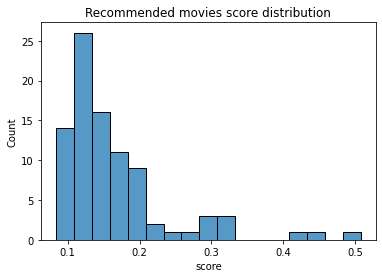

In [46]:
sns.histplot(overviewRecommended['score'])
plt.title('Recommended movies score distribution')

##### Creating similarty scores for movies using content column 

In [47]:
contentMatrix = tfidf.fit_transform(movies['content'])
contentSimilarity = cosine_similarity(contentMatrix,contentMatrix)

In [48]:
contentMatrix

<3394x12500 sparse matrix of type '<class 'numpy.float64'>'
	with 45126 stored elements in Compressed Sparse Row format>

In [49]:
pd.DataFrame(contentSimilarity)

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,1.000000,0.039005,0.022644,0.010369,0.038404,0.040423,0.0,0.041802,0.029744,0.042201,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013295,0.007773
1,0.039005,1.000000,0.022605,0.010351,0.021779,0.150126,0.0,0.023706,0.029693,0.042129,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007759
2,0.022644,0.022605,1.000000,0.027680,0.055377,0.023428,0.0,0.085812,0.012683,0.024458,...,0.00000,0.0,0.000000,0.000000,0.000000,0.013566,0.000000,0.043582,0.000000,0.020749
3,0.010369,0.010351,0.027680,1.000000,0.010780,0.010728,0.0,0.011734,0.000000,0.086262,...,0.00000,0.0,0.000000,0.005759,0.112284,0.014218,0.006695,0.024554,0.013516,0.030382
4,0.038404,0.021779,0.055377,0.010780,1.000000,0.110970,0.0,0.043459,0.012219,0.023563,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.028444,0.013821,0.008081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.000000,0.000000,0.013566,0.014218,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00863,0.0,0.005989,0.005852,0.006902,1.000000,0.000000,0.029263,0.000000,0.010658
3390,0.000000,0.000000,0.000000,0.006695,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.005646,0.000000,0.000000,1.000000,0.000000,0.004932,0.000000
3391,0.000000,0.000000,0.043582,0.024554,0.028444,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.029263,0.000000,1.000000,0.007234,0.018406
3392,0.013295,0.000000,0.000000,0.013516,0.013821,0.000000,0.0,0.015045,0.000000,0.000000,...,0.00000,0.0,0.000000,0.004242,0.000000,0.000000,0.004932,0.007234,1.000000,0.006361


##### Get recommendations using content column of the dataset

In [50]:
contentRecommended = getContentRecomMovies(randomUser, contentSimilarity)
contentRecommended

,movieId,score,titles
3,5952,0.912415,The Bourne Supremacy
4,7153,0.912415,Jason Bourne
12,4993,0.813651,The Bourne Identity
31,6934,0.802803,The Lord of the Rings: The Two Towers
32,6365,0.732912,The Lord of the Rings: The Return of the King
...,...,...,...
57,3029,0.128576,Scoop
83,4310,0.126763,The Jungle Book
27,72378,0.122876,The Bridges of Madison County
88,3730,0.117109,The Conversation


##### distribution of the scores of the recommended movies using content. 

Text(0.5, 1.0, 'Content based recommended movies score distribution')

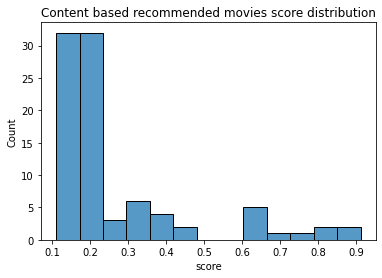

In [51]:
sns.histplot(contentRecommended['score'])
plt.title('Content based recommended movies score distribution')

### Item-Item Similarity implementation

##### create a copy of movies dataset for similarity calculations.

In [52]:
moviesItemSimilarity = movies
moviesItemSimilarity = moviesItemSimilarity[['movieId','title']]
moviesItemSimilarity

,movieId,title
0,72998,Avatar
1,53125,Pirates of the Caribbean: At World's End
2,136020,Spectre
3,91529,The Dark Knight Rises
4,93363,John Carter
...,...,...
3389,2361,Pink Flamingos
3390,4252,The Circle
3391,4645,Cure
3392,8914,Primer


In [53]:
pd.options.mode.chained_assignment = None
ratingsMatrix = movieRatings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratingsMatrix.fillna( 0, inplace = True )
ratingsMatrix.shape

(3394, 671)

In [79]:
ratingsMatrix

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,0.000000,0.901918,0.862305,0.709538,0.666010,0.925703,0.846156,0.731804,0.903586,0.568805,...,0.378490,0.324610,0.378490,0.521121,0.378490,0.378490,0.217119,0.350546,0.312994,0.378490
1,0.901918,0.000000,0.818015,0.620693,0.644214,0.860321,0.775975,0.717156,0.917200,0.622841,...,0.380495,0.315854,0.380495,0.512142,0.380495,0.380495,0.127180,0.389762,0.237820,0.380495
2,0.862305,0.818015,0.000000,0.819975,0.564677,0.834860,0.937535,0.785251,0.817831,0.470288,...,0.351373,0.288182,0.351373,0.383475,0.351373,0.351373,0.095809,0.197040,0.204224,0.351373
3,0.709538,0.620693,0.819975,0.000000,0.421313,0.769222,0.855035,0.719209,0.606118,0.414965,...,0.419237,0.335513,0.419237,0.402001,0.419237,0.419237,0.076954,0.173089,0.207560,0.419237
4,0.666010,0.644214,0.564677,0.421313,0.000000,0.616000,0.530133,0.481969,0.688089,0.395030,...,0.267310,0.221200,0.267310,0.601678,0.267310,0.267310,0.146017,0.227858,0.216334,0.267310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.378490,0.380495,0.351373,0.419237,0.267310,0.439782,0.357575,0.242723,0.356914,0.249606,...,0.986355,0.811063,0.986355,0.746942,0.986355,0.000000,0.143040,0.187693,0.461571,0.986355
3390,0.217119,0.127180,0.095809,0.076954,0.146017,0.150826,0.091924,0.062621,0.137126,0.094860,...,0.143040,0.196711,0.143040,0.151499,0.143040,0.143040,0.000000,0.085779,0.893802,0.143040
3391,0.350546,0.389762,0.197040,0.173089,0.227858,0.422923,0.185633,0.145900,0.371889,0.885510,...,0.187693,0.163492,0.187693,0.227839,0.187693,0.187693,0.085779,0.000000,0.130684,0.187693
3392,0.312994,0.237820,0.204224,0.207560,0.216334,0.272463,0.201780,0.138518,0.239204,0.159457,...,0.461571,0.445250,0.461571,0.378680,0.461571,0.461571,0.893802,0.130684,0.000000,0.461571


##### build pairwise distances for the ratings matrix

In [78]:
from sklearn.metrics import pairwise_distances
similarityScore = 1 - pairwise_distances(ratingsMatrix.values, metric="cosine" )
np.fill_diagonal( similarityScore, 0 )
ratingsMatrix = pd.DataFrame( similarityScore )
ratingsMatrix

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,0.000000,0.901918,0.862305,0.709538,0.666010,0.925703,0.846156,0.731804,0.903586,0.568805,...,0.378490,0.324610,0.378490,0.521121,0.378490,0.378490,0.217119,0.350546,0.312994,0.378490
1,0.901918,0.000000,0.818015,0.620693,0.644214,0.860321,0.775975,0.717156,0.917200,0.622841,...,0.380495,0.315854,0.380495,0.512142,0.380495,0.380495,0.127180,0.389762,0.237820,0.380495
2,0.862305,0.818015,0.000000,0.819975,0.564677,0.834860,0.937535,0.785251,0.817831,0.470288,...,0.351373,0.288182,0.351373,0.383475,0.351373,0.351373,0.095809,0.197040,0.204224,0.351373
3,0.709538,0.620693,0.819975,0.000000,0.421313,0.769222,0.855035,0.719209,0.606118,0.414965,...,0.419237,0.335513,0.419237,0.402001,0.419237,0.419237,0.076954,0.173089,0.207560,0.419237
4,0.666010,0.644214,0.564677,0.421313,0.000000,0.616000,0.530133,0.481969,0.688089,0.395030,...,0.267310,0.221200,0.267310,0.601678,0.267310,0.267310,0.146017,0.227858,0.216334,0.267310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.378490,0.380495,0.351373,0.419237,0.267310,0.439782,0.357575,0.242723,0.356914,0.249606,...,0.986355,0.811063,0.986355,0.746942,0.986355,0.000000,0.143040,0.187693,0.461571,0.986355
3390,0.217119,0.127180,0.095809,0.076954,0.146017,0.150826,0.091924,0.062621,0.137126,0.094860,...,0.143040,0.196711,0.143040,0.151499,0.143040,0.143040,0.000000,0.085779,0.893802,0.143040
3391,0.350546,0.389762,0.197040,0.173089,0.227858,0.422923,0.185633,0.145900,0.371889,0.885510,...,0.187693,0.163492,0.187693,0.227839,0.187693,0.187693,0.085779,0.000000,0.130684,0.187693
3392,0.312994,0.237820,0.204224,0.207560,0.216334,0.272463,0.201780,0.138518,0.239204,0.159457,...,0.461571,0.445250,0.461571,0.378680,0.461571,0.461571,0.893802,0.130684,0.000000,0.461571


##### get the similarity scores for item-item filtering 

In [56]:
def getItemSimilarity(movieId): 
    index=moviesItemSimilarity[moviesItemSimilarity['movieId']==movieId].index.tolist()
    index=index[0]
    score = ratingsMatrix.iloc[index]
    moviesItemSimilarity['similarity'] = np.array(score)
    moviesItemSimilarity.columns = ['movieId', 'title', 'similarity']

##### get movies based on item similarity

In [57]:
def getItemSimilarityRecom(user_id):
    userRatedMovies= movieRatings[(movieRatings.userId==user_id) & (movieRatings.rating > 4)]
    userRatedMovies=userRatedMovies['movieId'].iloc[0]
    getItemSimilarity(userRatedMovies)
    sortedMovies=moviesItemSimilarity.sort_values(["similarity"], ascending = False )
    userRatings= ratings[ratings['userId']== user_id]['movieId']
    recommendations = []
    for movieId in sortedMovies['movieId']:
        if movieId not in userRatings:
              recommendations.append(movieId)
    return recommendations[1:11]

In [58]:
def movieIdToTitle(listMovieIDs):
    titles= []
    for id in listMovieIDs:
        titles.append(movies.iloc[movieIdIndex[id]].title)
    return titles

##### display item similarty recommendation for the created random user 

In [59]:
movieIdToTitle(getItemSimilarityRecom(randomUser))

['Sahara',
 'The Haunted Mansion',
 'A.I. Artificial Intelligence',
 'Stuart Little 2',
 'Along Came Polly',
 'Contact',
 'Cellular',
 'The Mothman Prophecies',
 'Mamma Mia!',
 'Gangster Squad']

### user item similarity implementation. 

In [60]:
ratingsUsersMatrix = movieRatings.pivot_table(index=['userId'],columns=['movieId'],values='rating',fill_value=0).reset_index(drop=True)
ratingsUsersMatrix

movieId,1,10,11,14,15,16,17,18,19,20,...,158528,159093,159690,159858,160080,160271,160438,160440,160563,160565
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
1,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
669,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0


In [61]:
similarityScore = cosine_similarity(ratingsUsersMatrix.to_numpy())
np.fill_diagonal( similarityScore, 0 )
ratingsUsersMatrix = pd.DataFrame( similarityScore )
ratingsUsersMatrix

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.000000,0.000000,0.000000,0.084333,0.025645,0.000000,0.076257,0.000000,0.019779,0.000000,...,0.000000,0.000000,0.021369,0.038632,0.000000,0.000000,0.000000,0.093389,0.000000,0.026224
1,0.000000,0.000000,0.161424,0.171523,0.137666,0.000000,0.230059,0.149463,0.152033,0.060426,...,0.600587,0.083067,0.099985,0.193333,0.605019,0.520414,0.090347,0.031211,0.217209,0.123673
2,0.000000,0.161424,0.000000,0.102507,0.167911,0.074611,0.189243,0.279033,0.158645,0.141017,...,0.188232,0.074203,0.193247,0.194901,0.202305,0.189057,0.157449,0.092082,0.152963,0.195753
3,0.084333,0.171523,0.102507,0.000000,0.113360,0.075557,0.452839,0.251736,0.026628,0.190097,...,0.166791,0.067512,0.166016,0.250716,0.180144,0.140719,0.106759,0.120491,0.075490,0.272246
4,0.025645,0.137666,0.167911,0.113360,0.000000,0.060932,0.097948,0.159143,0.090336,0.040711,...,0.211535,0.024993,0.157786,0.243658,0.158209,0.075139,0.055337,0.044606,0.071737,0.243898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.000000,0.520414,0.189057,0.140719,0.075139,0.000000,0.224355,0.077071,0.055005,0.012314,...,0.454332,0.077958,0.088517,0.148757,0.471661,0.000000,0.076715,0.027827,0.141038,0.103027
667,0.000000,0.090347,0.157449,0.106759,0.055337,0.026543,0.047438,0.109923,0.147954,0.133763,...,0.102819,0.075274,0.116110,0.118557,0.150970,0.076715,0.000000,0.000000,0.141421,0.104791
668,0.093389,0.031211,0.092082,0.120491,0.044606,0.030087,0.093206,0.063749,0.034402,0.074128,...,0.019980,0.029864,0.087743,0.126636,0.034226,0.027827,0.000000,0.000000,0.047498,0.097561
669,0.000000,0.217209,0.152963,0.075490,0.071737,0.023461,0.120757,0.263910,0.394333,0.191272,...,0.226421,0.138390,0.128285,0.173308,0.186816,0.141038,0.141421,0.047498,0.000000,0.234150


In [62]:
similarUsers = ratingsUsersMatrix.idxmax(axis='columns')

In [63]:
similarUsers = pd.DataFrame( similarUsers , columns=['similarUser'])
similarUsers

,similarUser
0,324
1,368
2,378
3,136
4,312
...,...
666,160
667,453
668,625
669,8


##### get recommendations using user-item similartiy

In [64]:
def getUserSimilarityRecom (userId):
    userRatings = ratings[ratings['userId']== userId]['movieId']
    similarUser=similarUsers.iloc[0,0]
    recommended=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    for movieId in ratings[ratings['userId']== similarUser]['movieId']:
        if movieId not in userRatings:
            unwatchedMovie = movieRatings[(movieRatings.userId==similarUser) & (movieRatings.movieId==movieId)]
            recommended=pd.concat([recommended,unwatchedMovie])
        TopRecommended =recommended.sort_values(['rating'], ascending = False )[1:10]  
    return TopRecommended['movieId']

In [65]:
userSimilarityMovies = movieIdToTitle(getUserSimilarityRecom (randomUser))
print("Top suggested movies are :\n")
userSimilarityMovies

Top suggested movies are :



['The Princess Bride',
 'How the Grinch Stole Christmas',
 'Toy Story',
 'Cast Away',
 'Rain Man',
 'Saving Private Ryan',
 'Beetlejuice',
 'Office Space',
 'Indiana Jones and the Kingdom of the Crystal Skull']

### SVD model implementation

###### Import SVD libraries for Model based recommendation implementation.

In [66]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, KFold

In [67]:
reader = Reader()
ratings = pd.read_csv('../datasets/The_Movies/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


##### load user ratings dataset

In [68]:
userRating = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

##### Build SVD model and test the accuracy of the model using Root Mean Square error 

In [69]:
svd = SVD()
cross_validate(svd, userRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8958  0.8947  0.9022  0.8961  0.8932  0.8964  0.0031  
MAE (testset)     0.6923  0.6878  0.6937  0.6884  0.6907  0.6906  0.0022  
Fit time          5.48    6.64    6.19    6.20    5.82    6.06    0.39    
Test time         0.29    0.50    0.28    0.29    0.25    0.32    0.09    


{'test_rmse': array([0.89583199, 0.89466562, 0.90224411, 0.89613983, 0.89324823]),
 'test_mae': array([0.69228629, 0.68783201, 0.69366032, 0.68843125, 0.69066956]),
 'fit_time': (5.477440118789673,
  6.635404109954834,
  6.186685800552368,
  6.196462869644165,
  5.822935104370117),
 'test_time': (0.29410672187805176,
  0.49611759185791016,
  0.2827744483947754,
  0.28822922706604004,
  0.24800658226013184)}

###### Train SVD with full trainset

In [70]:
trainset = userRating.build_full_trainset()
svd.fit(trainset)

###### choose random movie id from dataset and calculate the score for the previously selected random user

In [71]:
randomMovieId = random.choice(movieRatings['movieId'])
movieRatings.iloc[movieIdIndex[randomMovieId]].title

'Harry Potter and the Half-Blood Prince'

##### prediction using SVD model for random movie ID

In [72]:
svdPrediction = svd.predict(randomUser, randomMovieId)
svdPrediction.est

2.837836368203324

### Hybrid model implementation

#### function to implement hybrid model implementation. uses content based recommendation as well as SVD to recommend movies to user

In [73]:
def getHybrdRecommendations(userId):
    contentRecommended = getContentRecomMovies(userId, contentSimilarity)
    #sns.histplot(contentRecommended['score'])
    svdRatings = []
    indexMap = pd.Series(contentRecommended.index, index=contentRecommended['movieId'])
    for movie in contentRecommended['movieId']:
        prediction = svd.predict(randomUser, movie)
        svdRatings.append((prediction.est + contentRecommended.iloc[indexMap[movie]].score)*(5/6))
    hybridRecommended = contentRecommended
    hybridRecommended['score'] = svdRatings
    sns.histplot(hybridRecommended['score'])
    hybridRecommended = hybridRecommended.sort_values(['score'],ascending=False)
    return hybridRecommended[:11]

##### create random user & fetch user data to test the model 

In [74]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("Total movies rated : ",len(ratedMovies))
print("Avg ratings :" , avgRating)
print("Top rated movies: ")
topRatedMovies['title'][:20]

userId :  457
Total movies rated :  504
Avg ratings : 2.4692460317460316
Top rated movies: 


52598       2001: A Space Odyssey
65168                 Taxi Driver
37406      No Country for Old Men
37810                  GoodFellas
37974         There Will Be Blood
43112                 The Shining
38327    The Shawshank Redemption
61434                 City of God
16667              Eyes Wide Shut
55008                Pulp Fiction
64189                        Kids
45105                    Sideways
50153                True Romance
32997                       Se7en
47885               Boogie Nights
61571             Rosemary's Baby
58586          Do the Right Thing
57963                The Wrestler
49442                  Black Swan
37899                    Scarface
Name: title, dtype: object

##### recommendations using the hybrid model

,movieId,score,titles
30,296,3.866675,We're No Angels
76,47,3.316440,Shaft
40,106782,3.311213,My Bloody Valentine
4,79132,3.286453,Pirates of the Caribbean: At World's End
113,1213,3.256648,We Were Soldiers
137,2959,3.191087,Only God Forgives
623,750,3.163986,Bad Boys II
226,50,3.161089,Bullets Over Broadway
587,1258,3.159864,The Prestige
184,55820,3.133799,For Your Consideration


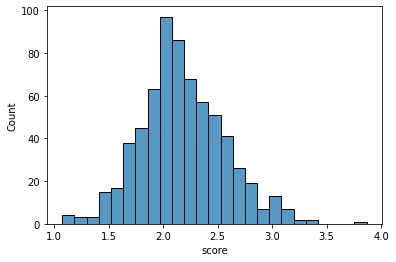

In [75]:
getHybrdRecommendations(randomUser)

##### recommenditions purely based on content based filtering for the above user

In [76]:
RecomContent = getContentRecomMovies(randomUser,contentSimilarity)
RecomContent

,movieId,score,titles
66,6934,0.802803,Don Jon
299,45728,0.775083,The Dark Knight Rises
67,6365,0.732912,G.I. Joe: The Rise of Cobra
379,2953,0.668601,About Time
387,4084,0.659324,Inception
...,...,...,...
615,4014,0.092729,"Food, Inc."
644,5666,0.092234,Mad Hot Ballroom
661,33639,0.090398,Dogma
616,55768,0.090111,Nurse Betty


Text(0.5, 1.0, 'content based recommended movies score distribution')

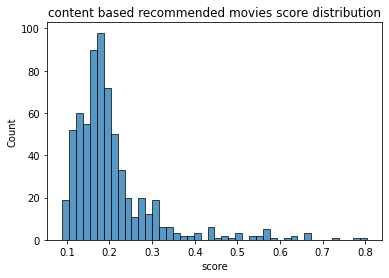

In [77]:
sns.histplot(RecomContent['score'])
plt.title('content based recommended movies score distribution')